In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X 값에 대해 코사인 변환 값을 반환
def true_fun(X):
  return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987231814 입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899210e+05 -1.87415866e+06  2.03716020e+07
 -1.44873197e+08  7.09315193e+08 -2.47065814e+09  6.24561298e+09
 -1.15676589e+10  1.56895083e+10 -1.54006206e+10  1.06457414e+10
 -4.91378328e+09  1.35919894e+09 -1.70381130e+08] 입니다.
Degree 15 MSE 는 181082440.22779876 입니다.


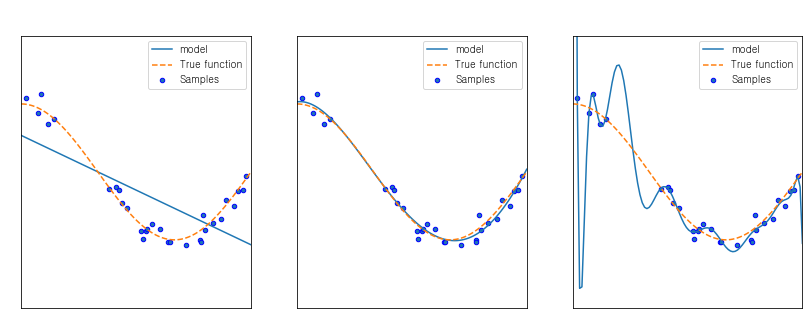

In [22]:
# 비교할 다항식 차수를 각각 1, 4, 15 로 변경하면서 예측 결과를 비교 
plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교 
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())
  
  # 개별 degree별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([ ('polynomial_features', polynomial_features), ('linear_regression', linear_regression) ])
  pipeline.fit(X.reshape(-1,1), y)
  
  # 교차 검증으로 다항 회귀를 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
  
  #pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
  
  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행 
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교 
  
  X_test = np.linspace(0, 1, 100)
  
  #예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="model")
  
  #실제값 곡선 
  plt.plot(X_test, true_fun(X_test), '--', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
  
  plt.xlabel("X", color="#FFF"); plt.xlim((0,1))
  plt.ylabel("y", color="#FFF"); plt.ylim((-2,2))
  plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()), color="#FFF")